In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from collections import Counter
from pprint import pprint
import pickle

In [3]:
from recipetools import search

In [4]:
# set the location of the capstone directory
cap_dir = os.getenv("CAPSTONE_DIR", '/home/ubuntu/gschool-capstone')

# set the location of the settings file
settings_file = os.path.join(cap_dir, 'settings', 'project_settings.json')

# set the pickle paths
pickle_path = os.path.join(cap_dir, 'data', 'pickles')

with open(os.path.join(pickle_path, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

with open(os.path.join(pickle_path, 'topics.pkl'), 'rb') as f:
    topics = pickle.load(f)

In [5]:
query = "Quinoa, Cilantro"
categories = []

In [6]:
terms = search.split_query(query)
print(terms)

['quinoa', 'cilantro']


In [7]:
ngrams = search.gen_ngrams(features, terms)
for k, v in ngrams.items():
    pprint({k: [val[0] for val in v]})

{'cilantro': ['cilantro',
              'chopped cilantro',
              'baby cilantro',
              'cilantro stems',
              'fresh cilantro',
              'cilantro roots',
              'cilantro sauce',
              'cilantro sprigs',
              'sprigs cilantro',
              'puréed cilantro',
              'cilantro leaves',
              'minced cilantro',
              'cilantro or oregano',
              'cilantro or mint',
              'cilantro, chopped',
              'cilantro and mint',
              'salsa de cilantro',
              'cilantro or chives',
              'chopped fresh cilantro',
              'cilantro or parsley',
              'parsley or cilantro',
              'cilantro or epazote',
              'coarsely chopped cilantro',
              'cilantro, basil or mint',
              'finely chopped cilantro',
              'generous bunch cilantro',
              'freshly chopped cilantro',
              'roughly chopped cilantro',
   

In [8]:
recipe_sets = search.gen_recipe_sets(features, categories, ngrams)
for k, v in recipe_sets.items():
    pprint('{}: {}'.format(k, v))

('cilantro: {10240, 4097, 6146, 10245, 2054, 14343, 16392, 10249, 10250, '
 '12296, 10252, 16394, 14350, 16393, 10256, 16401, 2069, 10261, 10263, 10262, '
 '6169, 6170, 10264, 10268, 16413, 10267, 16411, 10272, 10273, 4130, 10275, '
 '12324, 16412, 2087, 12327, 4138, 6187, 10283, 6189, 6190, 14383, 10282, '
 '4140, 12338, 6195, 4148, 10292, 6198, 10293, 14392, 6201, 8241, 10295, '
 '14391, 6205, 6206, 6209, 4163, 4164, 8262, 8263, 6216, 14408, 10314, 8271, '
 '16469, 4182, 8278, 10327, 12375, 16476, 10336, 10344, 6250, 6253, 6255, '
 '16495, 10354, 12403, 4212, 12404, 6262, 6263, 12408, 10360, 10362, 10364, '
 '16510, 16511, 16512, 12417, 6275, 14468, 4229, 10372, 4231, 4230, 6280, '
 '8331, 12429, 16525, 10381, 6288, 10384, 14482, 4238, 2192, 12432, 6291, '
 '16526, 12441, 14491, 6300, 12445, 159, 10400, 6305, 14500, 6310, 10407, '
 '4264, 16551, 8362, 6315, 10410, 8365, 6312, 10416, 10418, 4275, 2236, 14524, '
 '10433, 12485, 10438, 10441, 16586, 12492, 10449, 10451, 10452, 6357, 104

In [9]:
match = search.find_initial_matches(recipe_sets, features, with_pictures=True)
print(match)
pprint(len(match))

[ 9985  5890 15587  6625 15562  9770  6415  9776  3281  9778 10898 10930
 10837 10228 10552  9881 16638]
17


In [10]:
cluster, distances = search.compute_clusters(topics, match)

Counter({1: 7, 2: 5, 0: 4, 3: 1})


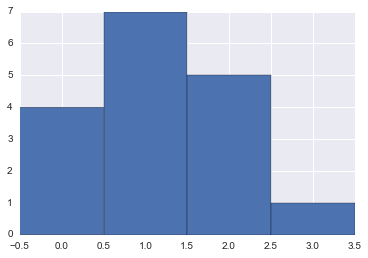

In [11]:
c = Counter(cluster.labels_)
l, r = np.array(list(c.keys()))-.5, np.array(list(c.keys()))+.5
k = set.union(set(l), set(r))
plt.hist(cluster.labels_, bins=list(sorted(k)))
plt.xlim(-.5, None);
print(c)

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [13]:
top_topics = cluster.cluster_centers_.argsort()[:, -5:][:, ::-1]
top_topics

array([[3, 7, 2, 6, 5],
       [3, 2, 6, 7, 0],
       [3, 7, 6, 2, 1],
       [3, 2, 7, 6, 0]])

In [14]:
def print_words_for_topic(H, topic_number, word_list):
    return ', '.join(np.array(word_list)[np.argsort(H[topic_number])[-10:][::-1]])
    
for ix, cls in enumerate(top_topics):
    print("Cluster {}".format(ix))
    for topic in cls:
        print(print_words_for_topic(topics['H'], topic, features['directions_vocab']))
    print('')

Cluster 0
lemon juice, food processor, season taste, taste adjust, bay leaf, baking dish, room temperature, adjust seasoning, 30 seconds, paper towels
cocktail glass, ice shake, cocktail shaker, shaker ice, shake strain, chilled cocktail, chilled cocktail glass, strain chilled, strain chilled cocktail, shaker ice shake
doesn burn, run underneath, eggs run underneath, eggs run, lifting edges, shake gently, hand lifting edges, hand lifting, make sure, shake gently tilting
wings cooked, gas grill, charcoal gas, charcoal gas grill, hot rack, hot rack inches, rack inches, moderately hot rack, moderately hot, grill moderately
blender blend, blend speed, blender blend speed, blender blend smooth, blend speed minute, blend smooth, speed minute, blend speed smooth, speed smooth, smooth right

Cluster 1
lemon juice, food processor, season taste, taste adjust, bay leaf, baking dish, room temperature, adjust seasoning, 30 seconds, paper towels
doesn burn, run underneath, eggs run underneath, eggs 